In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import credentials
import requests

#pulling data API
key =credentials.login['key_isaham']  # extract password

symbol = "FRONTKN"  # which stock to pull
response = requests.get("https://admin.isaham.my/api/chart?stock={}&key={}".format(symbol,key))
data = response.json()

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# makes plots bigger
plt.rcParams["figure.figsize"] = (20,8)

In [2]:
from numpy import asarray
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

In [3]:
df= pd.DataFrame.from_dict(data)
#df_actual = pd.DataFrame.from_dict(data)

In [4]:
df= df[['c','d','h','l','o','v']]
#df_actual= df_actual[['c','d','h','l','o','v']]

In [5]:
df['d'] = pd.to_datetime(df['d'], dayfirst= True )
#df_actual['d'] = pd.to_datetime(df_actual['d'], dayfirst= True )

In [6]:
df

,c,d,h,l,o,v
0,0.2636,2008-11-18,0.2957,0.2564,0.2957,132554.0
1,0.2886,2008-11-19,0.2886,0.2600,0.2707,81089.0
2,0.2636,2008-11-20,0.2814,0.2529,0.2814,273370.0
3,0.2743,2008-11-21,0.2779,0.2636,0.2636,125446.0
4,0.2386,2008-11-24,0.2707,0.2386,0.2636,36589.0
...,...,...,...,...,...,...
3026,4.7200,2021-03-16,4.7700,4.6400,4.7700,2344800.0
3027,4.7900,2021-03-17,4.8100,4.6700,4.7200,1455500.0
3028,4.8900,2021-03-18,4.9100,4.7600,4.8100,4251800.0
3029,4.9000,2021-03-19,4.9000,4.7200,4.8000,2293200.0


In [7]:
n=50
ma50=[] 

for i in range(len(df["c"])-(n-1)):
    ma = round(sum(df["c"][i:i+(n)])/n,4)
    #print(ma)
    ma50.append(ma)
    
df["MA50"] = pd.Series(ma50)
df["MA50"] = df["MA50"].shift(n-1)
#df["MA50"]

In [8]:
#filter uptrend price above ma50
# Calculating the gap of both MA

df["MAgap"] = df["c"] -  df["MA50"] 
#df["MAgap"]

In [9]:
df=df[df['MAgap']>0]

In [10]:
df.set_index('d',inplace=True,drop=True)

In [11]:
df.index.name = None

In [12]:
#Create the "L14" column in the DataFrame
df['L14'] = df['l'].rolling(window=14).min()

<ipython-input-12-c8cedd4ee1ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['L14'] = df['l'].rolling(window=14).min()


In [13]:
#Create the "H14" column in the DataFrame
df['H14'] = df['h'].rolling(window=14).max()

<ipython-input-13-d31995a3027f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['H14'] = df['h'].rolling(window=14).max()


In [14]:
#Create the "%K" column in the DataFrame
df['%K'] = 100*((df['c'] - df['L14']) / (df['H14'] - df['L14']) )

<ipython-input-14-4176b4b68b62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%K'] = 100*((df['c'] - df['L14']) / (df['H14'] - df['L14']) )


In [15]:
#Create the "%D" column in the DataFrame
df['%D'] = df['%K'].rolling(window=3).mean()

<ipython-input-15-cf2cb0f92c26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%D'] = df['%K'].rolling(window=3).mean()


In [16]:
df.head(5)

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D
2009-02-05,0.2386,0.2386,0.2386,0.2386,122.0,0.2149,0.0237,NaN,NaN,NaN,NaN
2009-02-06,0.2386,0.2386,0.2386,0.2386,0.0,0.2139,0.0247,NaN,NaN,NaN,NaN
2009-02-10,0.2386,0.2386,0.2386,0.2386,0.0,0.2134,0.0252,NaN,NaN,NaN,NaN
2009-02-11,0.2386,0.2386,0.2386,0.2386,0.0,0.2126,0.0260,NaN,NaN,NaN,NaN
2009-02-12,0.2314,0.2314,0.1814,0.1814,25528.0,0.2125,0.0189,NaN,NaN,NaN,NaN


In [17]:
df.tail(5)

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D
2021-03-16,4.72,4.77,4.64,4.77,2344800.0,4.6328,0.0872,4.4,5.95,20.645161,20.860215
2021-03-17,4.79,4.81,4.67,4.72,1455500.0,4.6576,0.1324,4.4,5.58,33.050847,23.920175
2021-03-18,4.89,4.91,4.76,4.81,4251800.0,4.6824,0.2076,4.4,5.30,54.444444,36.046818
2021-03-19,4.90,4.90,4.72,4.80,2293200.0,4.7084,0.1916,4.4,5.30,55.555556,47.683616
2021-03-22,4.90,4.95,4.84,4.85,2119200.0,4.7364,0.1636,4.4,5.30,55.555556,55.185185


Text(0.5, 1.0, 'Oscillator')

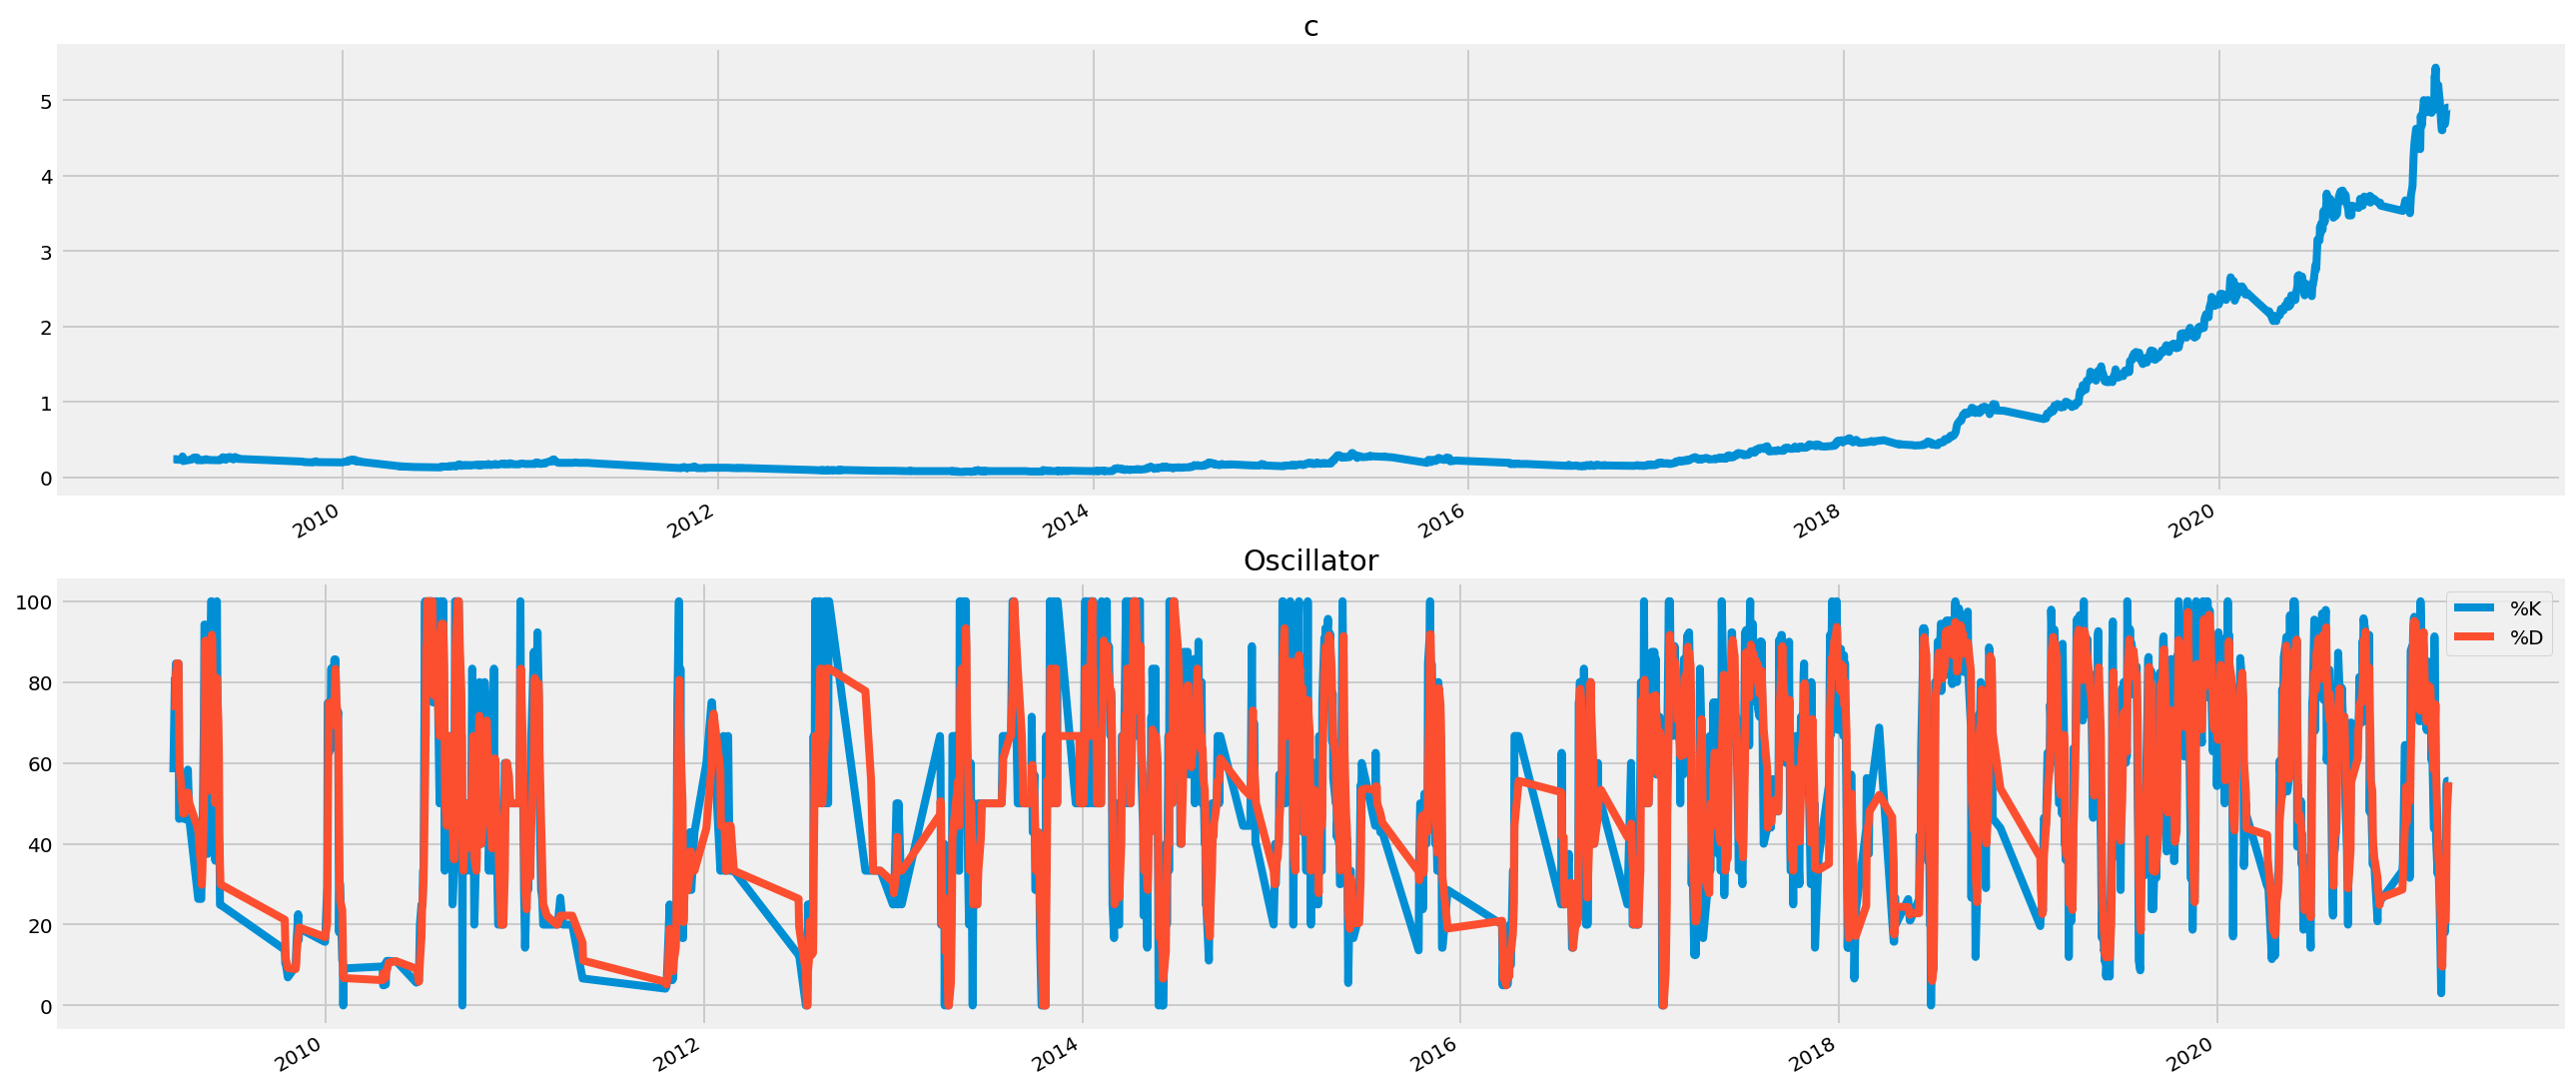

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(20,10))
df['c'].plot(ax=axes[0]); axes[0].set_title('c')
df[['%K','%D']].plot(ax=axes[1]); axes[1].set_title('Oscillator')

In [19]:
#Create a column in the DataFrame showing "TRUE" if sell entry signal is given and "FALSE" otherwise. 
#A sell is initiated when the %K line crosses down through the %D line and the value of the oscillator is above 80 
df['Sell OB'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > 80) 

<ipython-input-19-c39b1b59203f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sell OB'] = ((df['%K'] < df['%D']) & (df['%K'].shift(1) > df['%D'].shift(1))) & (df['%D'] > 80)


In [20]:
#Create a column in the DataFrame showing "TRUE" if buy entry signal is given and "FALSE" otherwise. 
#A buy is initiated when the %K line crosses up through the %D line and the value of the oscillator is below 20 
df['Buy OS'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < 20) 

<ipython-input-20-26b8565452e8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Buy OS'] = ((df['%K'] > df['%D']) & (df['%K'].shift(1) < df['%D'].shift(1))) & (df['%D'] < 20)


In [21]:
#df['Strategy'] = np.nan  
#df.loc[df['Buy OS'],'Strategy'] = 1  
#df.loc[df['Sell OB'],'Strategy'] = 0 

In [22]:
df

,c,h,l,o,v,MA50,MAgap,L14,H14,%K,%D,Sell OB,Buy OS
2009-02-05,0.2386,0.2386,0.2386,0.2386,122.0,0.2149,0.0237,NaN,NaN,NaN,NaN,False,False
2009-02-06,0.2386,0.2386,0.2386,0.2386,0.0,0.2139,0.0247,NaN,NaN,NaN,NaN,False,False
2009-02-10,0.2386,0.2386,0.2386,0.2386,0.0,0.2134,0.0252,NaN,NaN,NaN,NaN,False,False
2009-02-11,0.2386,0.2386,0.2386,0.2386,0.0,0.2126,0.0260,NaN,NaN,NaN,NaN,False,False
2009-02-12,0.2314,0.2314,0.1814,0.1814,25528.0,0.2125,0.0189,NaN,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-16,4.7200,4.7700,4.6400,4.7700,2344800.0,4.6328,0.0872,4.4,5.95,20.645161,20.860215,False,False
2021-03-17,4.7900,4.8100,4.6700,4.7200,1455500.0,4.6576,0.1324,4.4,5.58,33.050847,23.920175,False,False
2021-03-18,4.8900,4.9100,4.7600,4.8100,4251800.0,4.6824,0.2076,4.4,5.30,54.444444,36.046818,False,False
2021-03-19,4.9000,4.9000,4.7200,4.8000,2293200.0,4.7084,0.1916,4.4,5.30,55.555556,47.683616,False,False


In [23]:
overbought =df['Sell OB']

In [24]:
oversold =df['Buy OS']

In [25]:
date_os=list(oversold[oversold == True].index)

In [26]:
date_ob=list(overbought[overbought == True].index)

In [27]:
# transaction recording
buy = []
sell = []
sdate = []
bdate = []
wr = []
pct = []


for n,i in enumerate(date_os):
    print(n,"Buy:", i, "Price:", df['c'].loc[i])
    buy.append(df['c'].loc[i])
    bdate.append(i)
    r=[]
    #print("before", len(r))
    for m,k in enumerate(date_ob):
        
        if k>i:
            r.append(m)
            #print('after',len(r))
            if len(r) ==1:
                print(m,"Sell :", k, "Price:",df['c'].loc[k])
                print("Percentage change:",(((df['c'].loc[k]/df['c'].loc[i])-1)*100) )
                sell.append(df['c'].loc[k])
                sdate.append(k)
                pct_change=((df['c'].loc[k]/df['c'].loc[i])-1)*100
                pct.append(((df['c'].loc[k]/df['c'].loc[i])-1)*100)
                wr =pct_change>0
                #print(wr)
                #print(len(wr[wr==True])+n)
                                
                if pct_change >0:
                    print("1")
                    #print(len(wr[wr==True])+n)
                    #wr.append(1)
                    
                else:
                    print('0')
                    #print(len(wr[wr==True])-n)
                    #wr.append(0)
                    
            elif len(r)>1:
                pass
            
        
    print('........')
print('Number of trade:',len(date_os))

# Checking for final transaction, make sure it is sell, as we want to close the position
if len(buy) == len(sell):
    print("Yes \n", "Buy:", len(buy), "Sell:", len(sell))
    print("Position closed")
    pass
else:
    print("No, \n", "Buy:{}, Sell:{}, Closing the position".format(len(buy),len(sell)))
    del(buy[-1])
    del(bdate[-1])
    print("Position closed")
    
    

dct = {
    "Buy_Date": bdate,
    "Buy": buy,
    "Sell": sell,
    "Sell_Date": sdate,
    #"W_rate": wr,
    "Pct_change": pct
    
}

trans = pd.DataFrame(dct)
#print(len(wr[wr==True]))

0 Buy: 2009-11-04 00:00:00 Price: 0.1957
2 Sell : 2010-08-04 00:00:00 Price: 0.145
Percentage change: -25.90700051098621
0
........
1 Buy: 2010-02-05 00:00:00 Price: 0.2029
2 Sell : 2010-08-04 00:00:00 Price: 0.145
Percentage change: -28.536224741251846
0
........
2 Buy: 2010-04-26 00:00:00 Price: 0.145
2 Sell : 2010-08-04 00:00:00 Price: 0.145
Percentage change: 0.0
0
........
3 Buy: 2010-04-28 00:00:00 Price: 0.14
2 Sell : 2010-08-04 00:00:00 Price: 0.145
Percentage change: 3.5714285714285587
1
........
4 Buy: 2010-06-30 00:00:00 Price: 0.13
2 Sell : 2010-08-04 00:00:00 Price: 0.145
Percentage change: 11.538461538461519
1
........
5 Buy: 2010-12-06 00:00:00 Price: 0.17
5 Sell : 2011-01-13 00:00:00 Price: 0.195
Percentage change: 14.705882352941169
1
........
6 Buy: 2011-03-23 00:00:00 Price: 0.19
7 Sell : 2011-11-15 00:00:00 Price: 0.135
Percentage change: -28.947368421052634
0
........
7 Buy: 2011-10-24 00:00:00 Price: 0.13
7 Sell : 2011-11-15 00:00:00 Price: 0.135
Percentage change

In [28]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change
0,2009-11-04,0.1957,0.145,2010-08-04,-25.907001
1,2010-02-05,0.2029,0.145,2010-08-04,-28.536225
2,2010-04-26,0.1450,0.145,2010-08-04,0.000000
3,2010-04-28,0.1400,0.145,2010-08-04,3.571429
4,2010-06-30,0.1300,0.145,2010-08-04,11.538462
5,2010-12-06,0.1700,0.195,2011-01-13,14.705882
6,2011-03-23,0.1900,0.135,2011-11-15,-28.947368
7,2011-10-24,0.1300,0.135,2011-11-15,3.846154
8,2011-11-02,0.1250,0.135,2011-11-15,8.000000
9,2011-11-04,0.1250,0.135,2011-11-15,8.000000


In [29]:
wr = []
for i in range(len(trans)):
    if trans["Pct_change"][i] > 0:
        wr.append(1)
    else:
        wr.append(0)
trans["wr"] = pd.Series(wr)

In [30]:
trans

,Buy_Date,Buy,Sell,Sell_Date,Pct_change,wr
0,2009-11-04,0.1957,0.145,2010-08-04,-25.907001,0
1,2010-02-05,0.2029,0.145,2010-08-04,-28.536225,0
2,2010-04-26,0.1450,0.145,2010-08-04,0.000000,0
3,2010-04-28,0.1400,0.145,2010-08-04,3.571429,1
4,2010-06-30,0.1300,0.145,2010-08-04,11.538462,1
5,2010-12-06,0.1700,0.195,2011-01-13,14.705882,1
6,2011-03-23,0.1900,0.135,2011-11-15,-28.947368,0
7,2011-10-24,0.1300,0.135,2011-11-15,3.846154,1
8,2011-11-02,0.1250,0.135,2011-11-15,8.000000,1
9,2011-11-04,0.1250,0.135,2011-11-15,8.000000,1


In [31]:
net_pct=round(sum(trans['Pct_change']),4)
wrate = round(len(trans[trans["wr"]==1])/len(trans["wr"])*100, 4)
print("Winning rate at {}% for {} trades and winning percentage {}%.".format(wrate, len(trans["wr"]),net_pct))
risk = 100-wrate
print("While, using this strategy, we are exposed to {}% of lossing risk for {} trades.".format(risk, len(trans["wr"])))

Winning rate at 55.8824% for 34 trades and winning percentage 40.0293%.
While, using this strategy, we are exposed to 44.1176% of lossing risk for 34 trades.
